In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | maghama
City not found. Skipping...
Processing Record 2 of Set 1 | clyde river
Processing Record 3 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 1 | balkanabat
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | lityn
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | caravelas
Processing Record 9 of Set 1 | verkhnetulomskiy
Processing Record 10 of Set 1 | hihifo
City not found. Skipping...
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | aksarka
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | aljezur
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | pangnirtung
Processing Record 20 

Processing Record 39 of Set 4 | pui
Processing Record 40 of Set 4 | talnakh
Processing Record 41 of Set 4 | evensk
Processing Record 42 of Set 4 | kardla
Processing Record 43 of Set 4 | pitimbu
Processing Record 44 of Set 4 | borama
City not found. Skipping...
Processing Record 45 of Set 4 | kavieng
Processing Record 46 of Set 4 | angoche
Processing Record 47 of Set 4 | barbacoas
Processing Record 48 of Set 4 | kadykchan
City not found. Skipping...
Processing Record 49 of Set 4 | changji
Processing Record 50 of Set 4 | tourlaville
Processing Record 1 of Set 5 | nurota
Processing Record 2 of Set 5 | bargal
City not found. Skipping...
Processing Record 3 of Set 5 | ternate
Processing Record 4 of Set 5 | padang
Processing Record 5 of Set 5 | roald
Processing Record 6 of Set 5 | lavrentiya
Processing Record 7 of Set 5 | chuy
Processing Record 8 of Set 5 | saint-joseph
Processing Record 9 of Set 5 | isiro
Processing Record 10 of Set 5 | northam
Processing Record 11 of Set 5 | chifeng
Proces

Processing Record 30 of Set 8 | porgera
Processing Record 31 of Set 8 | chokurdakh
Processing Record 32 of Set 8 | ampanihy
Processing Record 33 of Set 8 | flin flon
Processing Record 34 of Set 8 | praia da vitoria
Processing Record 35 of Set 8 | muroto
Processing Record 36 of Set 8 | luba
Processing Record 37 of Set 8 | itarema
Processing Record 38 of Set 8 | college
Processing Record 39 of Set 8 | najran
Processing Record 40 of Set 8 | la romana
Processing Record 41 of Set 8 | rabak
Processing Record 42 of Set 8 | carnarvon
Processing Record 43 of Set 8 | taltal
Processing Record 44 of Set 8 | nanortalik
Processing Record 45 of Set 8 | erdaojiang
Processing Record 46 of Set 8 | shenjiamen
Processing Record 47 of Set 8 | glendive
Processing Record 48 of Set 8 | mulege
Processing Record 49 of Set 8 | ossora
Processing Record 50 of Set 8 | almora
Processing Record 1 of Set 9 | surt
Processing Record 2 of Set 9 | havre-saint-pierre
Processing Record 3 of Set 9 | miraflores
Processing Rec

Processing Record 18 of Set 12 | hermiston
Processing Record 19 of Set 12 | sao joao da barra
Processing Record 20 of Set 12 | baghdad
Processing Record 21 of Set 12 | atar
Processing Record 22 of Set 12 | celestun
Processing Record 23 of Set 12 | springdale
Processing Record 24 of Set 12 | takaka
Processing Record 25 of Set 12 | mumford
Processing Record 26 of Set 12 | tilichiki
Processing Record 27 of Set 12 | spring valley
Processing Record 28 of Set 12 | chambersburg
Processing Record 29 of Set 12 | macamic
Processing Record 30 of Set 12 | great bend
Processing Record 31 of Set 12 | nhulunbuy
Processing Record 32 of Set 12 | ho
City not found. Skipping...
Processing Record 33 of Set 12 | babu
Processing Record 34 of Set 12 | nampula
Processing Record 35 of Set 12 | acarau
Processing Record 36 of Set 12 | peniche
Processing Record 37 of Set 12 | palora
Processing Record 38 of Set 12 | road town
Processing Record 39 of Set 12 | la crosse
Processing Record 40 of Set 12 | borgarnes
Pro

In [10]:
len(city_data)

553

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Clyde River,70.4692,-68.5914,10.63,92,96,9.22,CA,2021-12-03 17:27:01
1,Balkanabat,39.5108,54.3671,45.61,75,55,11.10,TM,2021-12-03 17:27:02
2,Lityn,49.3251,28.0809,32.32,83,100,10.60,UA,2021-12-03 17:27:02
3,Bredasdorp,-34.5322,20.0403,63.28,63,78,11.56,ZA,2021-12-03 17:27:03
4,Caravelas,-17.7125,-39.2481,81.73,67,87,10.38,BR,2021-12-03 17:27:03
5,Verkhnetulomskiy,68.6073,31.7962,5.13,100,97,0.40,RU,2021-12-03 17:27:03
6,Cherskiy,68.7500,161.3000,-8.99,97,100,16.53,RU,2021-12-03 17:25:31
7,Nikolskoye,59.7035,30.7861,22.01,95,100,8.16,RU,2021-12-03 17:27:04
8,Aksarka,66.5606,67.7975,-8.39,90,100,12.95,RU,2021-12-03 17:27:04
9,Arraial Do Cabo,-22.9661,-42.0278,80.56,65,20,16.11,BR,2021-12-03 17:27:05


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Clyde River,CA,2021-12-03 17:27:01,70.4692,-68.5914,10.63,92,96,9.22
1,Balkanabat,TM,2021-12-03 17:27:02,39.5108,54.3671,45.61,75,55,11.10
2,Lityn,UA,2021-12-03 17:27:02,49.3251,28.0809,32.32,83,100,10.60
3,Bredasdorp,ZA,2021-12-03 17:27:03,-34.5322,20.0403,63.28,63,78,11.56
4,Caravelas,BR,2021-12-03 17:27:03,-17.7125,-39.2481,81.73,67,87,10.38
5,Verkhnetulomskiy,RU,2021-12-03 17:27:03,68.6073,31.7962,5.13,100,97,0.40
6,Cherskiy,RU,2021-12-03 17:25:31,68.7500,161.3000,-8.99,97,100,16.53
7,Nikolskoye,RU,2021-12-03 17:27:04,59.7035,30.7861,22.01,95,100,8.16
8,Aksarka,RU,2021-12-03 17:27:04,66.5606,67.7975,-8.39,90,100,12.95
9,Arraial Do Cabo,BR,2021-12-03 17:27:05,-22.9661,-42.0278,80.56,65,20,16.11


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

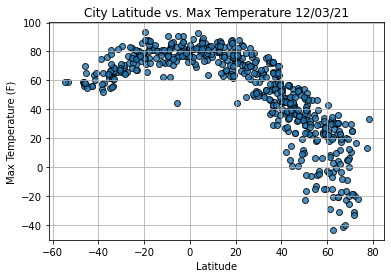

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

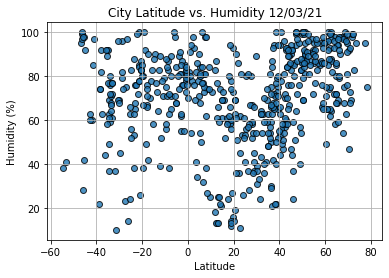

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

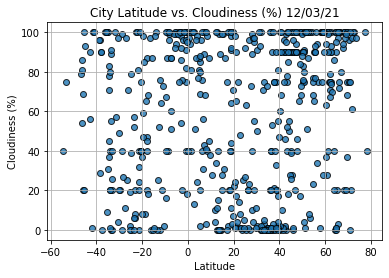

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

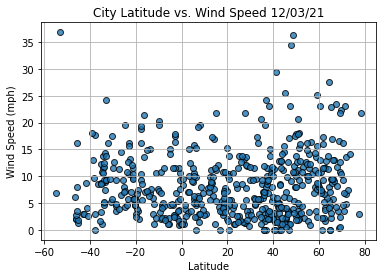

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [26]:
northern_hemi_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Clyde River,CA,2021-12-03 17:27:01,70.4692,-68.5914,10.63,92,96,9.22
1,Balkanabat,TM,2021-12-03 17:27:02,39.5108,54.3671,45.61,75,55,11.10
2,Lityn,UA,2021-12-03 17:27:02,49.3251,28.0809,32.32,83,100,10.60
5,Verkhnetulomskiy,RU,2021-12-03 17:27:03,68.6073,31.7962,5.13,100,97,0.40
6,Cherskiy,RU,2021-12-03 17:25:31,68.7500,161.3000,-8.99,97,100,16.53


In [27]:
southern_hemi_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Bredasdorp,ZA,2021-12-03 17:27:03,-34.5322,20.0403,63.28,63,78,11.56
4,Caravelas,BR,2021-12-03 17:27:03,-17.7125,-39.2481,81.73,67,87,10.38
9,Arraial Do Cabo,BR,2021-12-03 17:27:05,-22.9661,-42.0278,80.56,65,20,16.11
12,Punta Arenas,CL,2021-12-03 17:24:50,-53.1500,-70.9167,59.02,41,75,36.82
13,Saint-Philippe,RE,2021-12-03 17:27:06,-21.3585,55.7679,78.39,85,32,9.66


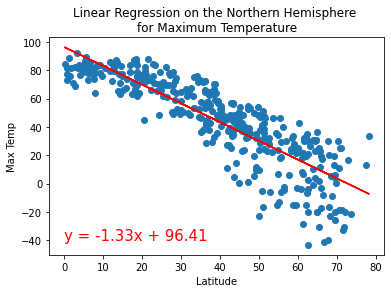

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n' 
                       'for Maximum Temperature', 'Max Temp',(0,-40))

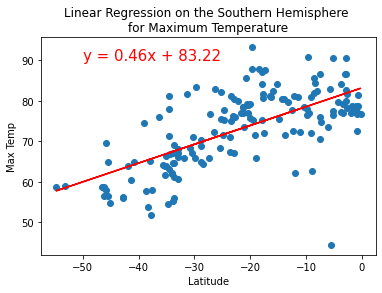

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Maximum Temperature', 'Max Temp',(-50,90))

In [38]:
# The correlation between the latitude and the maximum temperature is strong
# because the r-value is nearly 0.7 for the Southern Hemisphere
# Checking r-value for Southern Hemisphere
linregress(x_values, y_values)

LinregressResult(slope=0.46428162455499167, intercept=83.21701147199386, rvalue=0.6705827234817333, pvalue=9.049816299625053e-23, stderr=0.04035327684003774, intercept_stderr=1.0332161754586566)

In [40]:
# Checking r-value for Northern Hemisphere
# The correlation between the latitude and the maximum temperature is strong to very
# strong because the r-value is less than –0.7 for the Northern Hemisphere
linregress(x_values, y_values)

LinregressResult(slope=-1.3255474538612564, intercept=96.40838710143572, rvalue=-0.8604902161096859, pvalue=2.121145852163287e-115, stderr=0.039894211785554926, intercept_stderr=1.7454072320041973)

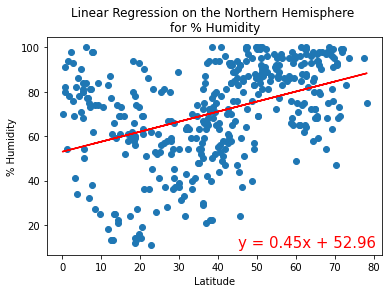

In [43]:
# Linear regression on the Percent Humidity in Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n' 
                       'for % Humidity', '% Humidity',(45,10))

In [45]:
# Checking r-value for Northern Hemisphere
linregress(x_values, y_values)

LinregressResult(slope=0.4518044477666743, intercept=52.95728114594215, rvalue=0.4070891157919691, pvalue=5.839128391545904e-17, stderr=0.05153010670968159, intercept_stderr=2.2544879793712957)

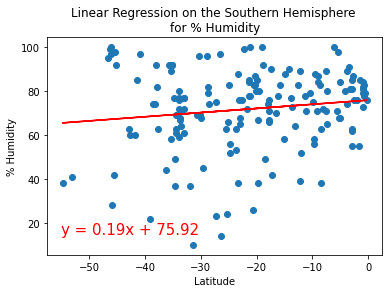

In [59]:
# Linear regression on the Percent Humidity in Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n' 
                       'for % Humidity', '% Humidity',(-55,15))

In [49]:
# Checking r-value for Southern Hemisphere
linregress(x_values, y_values)

LinregressResult(slope=0.18885105079583078, intercept=75.91621081045822, rvalue=0.13892917784867181, pvalue=0.07603551099984328, stderr=0.105763600946843, intercept_stderr=2.707999742033601)

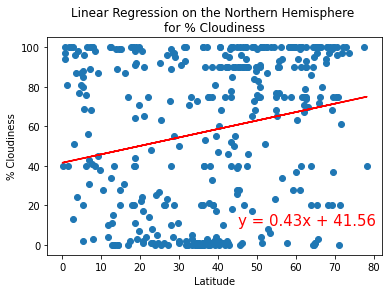

In [63]:
# Linear regression on the Cloudiness in Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n' 
                       'for % Cloudiness', '% Cloudiness',(45,10))

In [51]:
# Checking r-value for Northern Hemisphere
linregress(x_values, y_values)

LinregressResult(slope=0.4273481205077584, intercept=41.55837689115198, rvalue=0.219024970202989, pvalue=1.306668676755704e-05, stderr=0.09677374787880601, intercept_stderr=4.233937502607293)

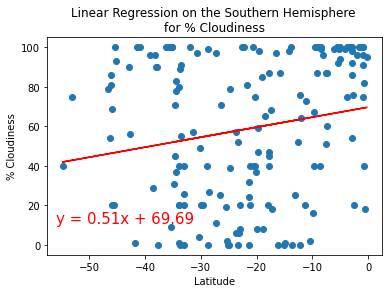

In [64]:
# Linear regression on the Cloudiness in Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n' 
                       'for % Cloudiness', '% Cloudiness',(-56,11))

In [58]:
# Checking r-value for Southern Hemisphere
linregress(x_values, y_values)

LinregressResult(slope=0.5061959011739272, intercept=69.68633818681562, rvalue=0.19247701494438924, pvalue=0.0135420021269248, stderr=0.2027611272323635, intercept_stderr=5.191550545973276)

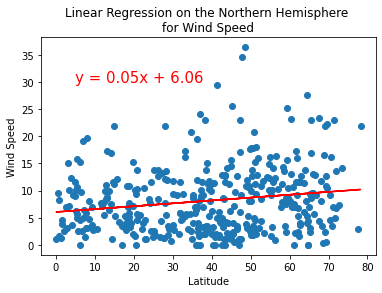

In [66]:
# Linear regression on the Wind Speed in Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n' 
                       'for Wind Speed', 'Wind Speed',(5,30))

In [67]:
# Checking r-value for Northern Hemisphere
linregress(x_values, y_values)

LinregressResult(slope=0.05291183724475112, intercept=6.059842487326123, rvalue=0.17310982696043462, pvalue=0.0006053712043970548, stderr=0.015302729049488114, intercept_stderr=0.6695080002068963)

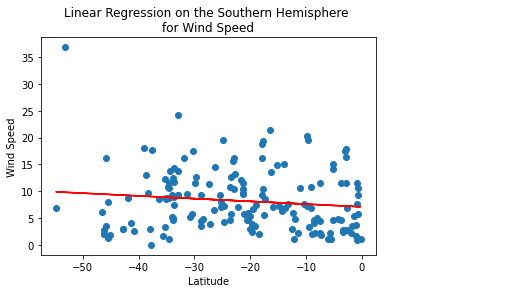

In [68]:
# Linear regression on the Wind Speed in Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n' 
                       'for Wind Speed', 'Wind Speed',(5,30))